# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Бояркин Никита и Сергевнин Дмитрий. Вариант №19.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — сигнал данных, у которого каждый из представленных параметров описывается функцией времени и непрерывным множеством возможных значений.

**Дискретный сигнал** — это сигнал данных, который дискретный по времени и непрерывный по состоянию.

**Цифровой сигнал** — это сигнал данных, который можно представить в виде последовательности дискретных (цифровых) значений.

**Частота дискретизации $f_d$** — частота взятия отсчётов непрерывного по времени сигнала при его дискретизации.

**Единичный цифровой импульс**

$$\delta_d(k)=
\begin{cases}
1, & k=0,\\
0, & k\neq0.
\end{cases}
,n=...,-2,-1,0,1,2,...$$
Используется как аналог дельта-функции:
$$\delta(t)=
\begin{cases}
\infty, & t=0,\\
0, & t\neq0.
\end{cases}
,\int_{-\infty}^{\infty}\delta(t)dt=1$$

**Дискретный единичный скачок**:
$$\sigma_d(k)=
\begin{cases}
1, & k\geq0,\\
0, & k<0.
\end{cases}
,k=...,-2,-1,0,1,2,...$$
Используется как дискретный аналог функции единичного скачка:
$$\sigma(t)=
\begin{cases}
1, & t>0,\\
0.5 & \text{или неопределено,} & t=0, \\
0, & t<0.
\end{cases}$$
**Дискретная экспоненциальная функция**
$$s_1(k)=
\begin{cases}
0, & k<0,\\
a^k, & k\geq0.
\end{cases}
,k=...,-2,-1,0,1,2,...$$
**Дискретная затухающая синусоида**:
$$s(k)=a^kcos(k\omega+\varphi)$$
**Дискретный комплексный гармонический сигнал**:
$$s_2(n)=Cexp(j\hat\omega_0k)$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. взаимосвязь между дискретным и дискретным нормированным временем;  
    b. различие между единичным цифровым импульсом и дельта-функцией.  

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$
с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. соответствие между дискретным и аналоговым единичными скачками;  
    b. чему равна частота дискретизации дискретного единичного скачка.  

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C \cdot exp(j\hat{\omega}_0k)$с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.  
5. Вывести графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.  

6. Сделать выводы.


## Выполнение работы



### 0. Импорт библиотек и определение переменных в зависимости от варианта

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse


Nb = 19
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
m = 5 + Nb % 5

print("""
Номер бригады: {}\n
Длина последовательности: {}\n
Период дискретизации: {}\n
Основание экспоненты: {}\n
Амплитуда гармонического сигнала: {}\n
Частота гармонического сигнала: {}\n
Задержка: {}""".format(Nb, N, T, a, C, w0, m))


Номер бригады: 19

Длина последовательности: 34

Период дискретизации: 0.001

Основание экспоненты: -0.895

Амплитуда гармонического сигнала: 5

Частота гармонического сигнала: 0.3141592653589793

Задержка: 9


### 1. Единичный цифровой импульс

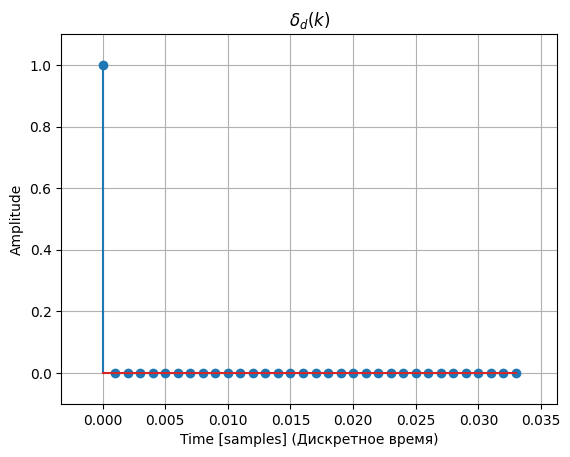

In [ ]:
k = np.arange(N)
# дискретное время
t = np.linspace(0, (N - 1) * T, N, endpoint=True)
# дискретное нормированное время
norm_t = np.linspace(0, N - 1, N, endpoint=True)
# Единичный импульс
delta_d = unit_impulse(N)
# График
plt.stem(t, delta_d)
plt.margins(0.1, 0.1)
plt.title("$\delta_d(k)$")
plt.xlabel('Time [samples] (Дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

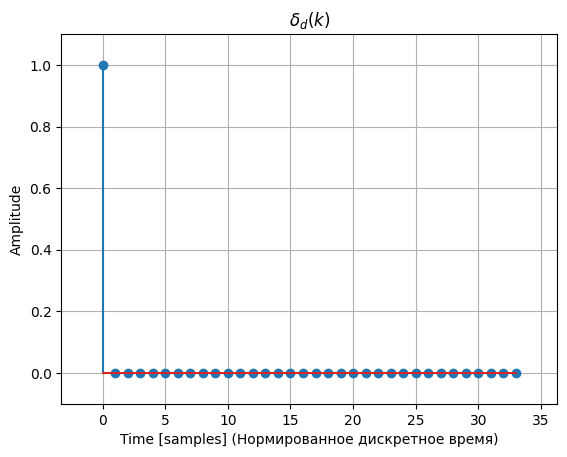

In [ ]:
# График
plt.stem(norm_t, delta_d)
plt.margins(0.1, 0.1)
plt.title("$\delta_d(k)$")
plt.xlabel('Time [samples] (Нормированное дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### a. Взаимосвязь между дискретным и дискретным нормированным временем.

Дискретное время, выраженное через $nT$, изменяется в зависимости от выбора периода дискретизации $T$. Однако нормированное дискретное время, представленное как $n$, не зависит от конкретного значения периода дискретизации. Можно сказать, что нормированное дискретное время - это дискретное время, где период дискретизации принимается равным единице, и поэтому оно не подвержено влиянию различных значений $T$.

#### b. Различие между единичным цифровым импульсом и дельта-функцией.

Единичный цифровой импульс можно рассматривать как дискретный аналог дельта-функции. В то время как дельта-функция является непрерывной и имеет бесконечный скачок амплитуды в одной точке времени, единичный цифровой импульс представляет собой дискретную функцию, где амплитуда скачка равна 1. Единичный цифровой импульс используется для моделирования мгновенного всплеска или события в дискретном времени. Дельта-функция используется для моделирования идеализированных импульсов нулевой длительности в непрерывном времени.

### 2. Дискретный единичный скачок

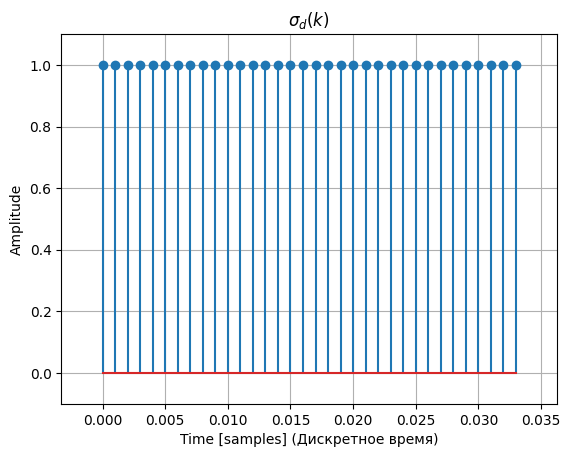

In [ ]:
# Дискретный единичный скачок (Heaviside function)
xh = np.heaviside(t, 1)
# График
plt.stem(t, xh)
plt.margins(0.1, 0.1)
plt.title("$\sigma_d(k)$")
plt.xlabel('Time [samples] (Дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

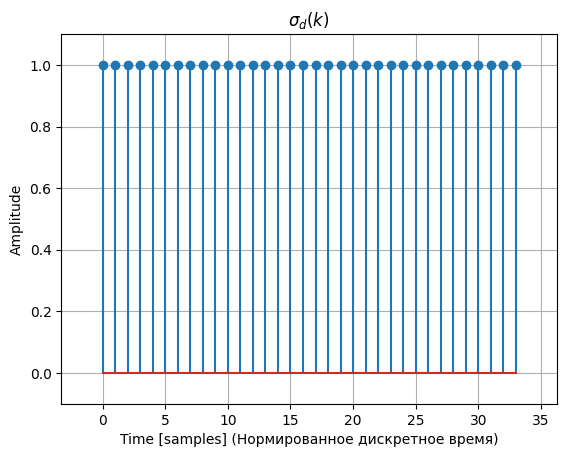

In [ ]:
# Дискретный единичный скачок (Heaviside function)
xh = np.heaviside(norm_t, 1)
# График
plt.stem(norm_t, xh)
plt.margins(0.1, 0.1)
plt.title("$\sigma_d(k)$")
plt.xlabel('Time [samples] (Нормированное дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### а. Соответствие между дискретным и аналоговым единичными скачками.

Соответствие между ними заключается в том, что оба они представляют мгновенные переходы с нулевого значения (или нулевой амплитуды) к значению 1 в определенный момент времени или дискретном отсчете. Разница заключается в том, что дискретный единичный скачок применяется к дискретным сигналам и дискретному времени, в то время как аналоговый единичный скачок применяется к аналоговым сигналам и непрерывному времени.

#### b.Чему равна частота дискретизации дискретного единичного скачка.
Частота дискретизации единичного скачка равна $f_d = \frac{1}{T}$.

In [ ]:
f_d = 1/T
print("f_d = {}".format(f_d))

f_d = 1000.0


В данном случае, частота дискретизации единичного скачка равна $f_d = \frac{1}{T} = 1000$.

### 3. Дискретная экспоненциальная функция

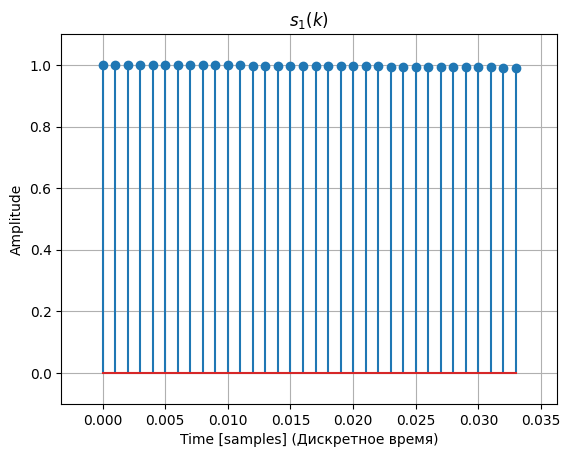

In [ ]:
def discrete_exponential(k_arr: list, a: float) -> list:
    return [a ** k if k >= 0 else 0 for k in k_arr]


plt.stem(t, np.real(discrete_exponential(t.tolist(), a)))
plt.margins(0.1, 0.1)
plt.title("$s_1(k)$")
plt.xlabel('Time [samples] (Дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

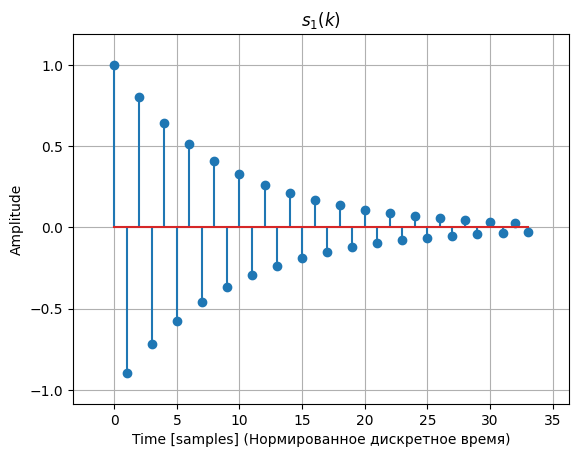

In [ ]:
plt.stem(norm_t, np.real(discrete_exponential(norm_t.tolist(), a)))
plt.margins(0.1, 0.1)
plt.title("$s_1(k)$")
plt.xlabel('Time [samples] (Нормированное дискретное время)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### Соответствие между дискретной и аналоговой экспонентами

Главное различие заключается в том, что при отрицательных значениях параметра $k$ аналоговая функция имеет значения, равные $a^k$, в то время как дискретная функция принимает нулевые значения для таких отрицательных значений $k$.

### 4. Дискретный комплексный гармонический сигнал

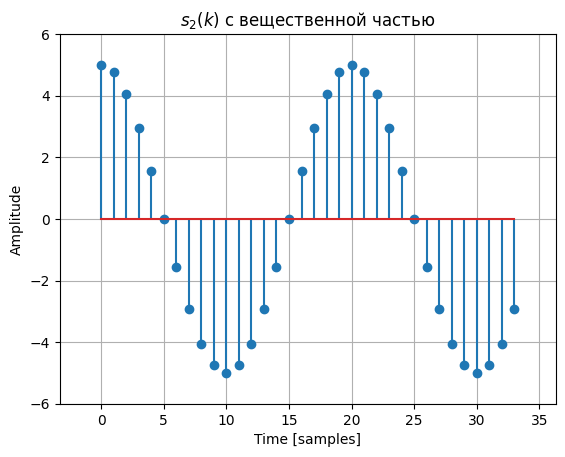

In [ ]:
def discrete_complex_harmonic_signal(C, w0, n_values):
    signal = C * np.exp(1j * (w0 * n_values))
    return signal

plt.stem(norm_t, np.real(discrete_complex_harmonic_signal(C, w0, norm_t)))
plt.margins(0.1, 0.1)
plt.title("$s_2(k)$ c вещественной частью")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

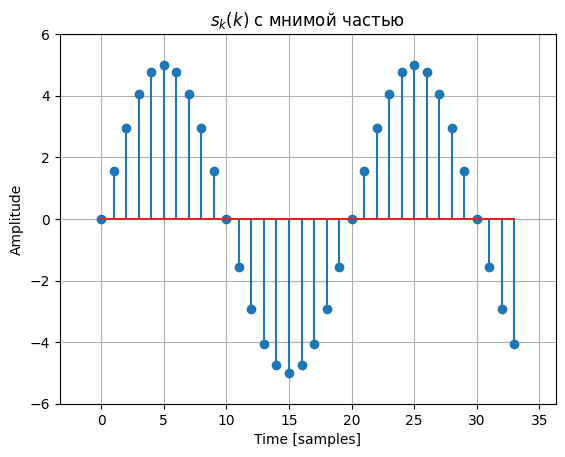

In [ ]:
plt.stem(norm_t, np.imag(discrete_complex_harmonic_signal(C, w0, norm_t)))
plt.margins(0.1, 0.1)
plt.title("$s_k(k)$ c мнимой частью")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### Данный сигнал в виде комбинации двух вещественных последовательностей

Его вещественная часть описывается функцией косинуса $cos(\hatω_0k)$, а мнимая часть - функцией синуса $sin(\hatω_0k)$. По формуле Эйлера:

$C \cdot e^{j \hat{\omega}_0 k} = C \cdot cos(\hat{\omega}_0 k) + j \cdot C \cdot sin(\hat{\omega}_0 k)$

### Графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов

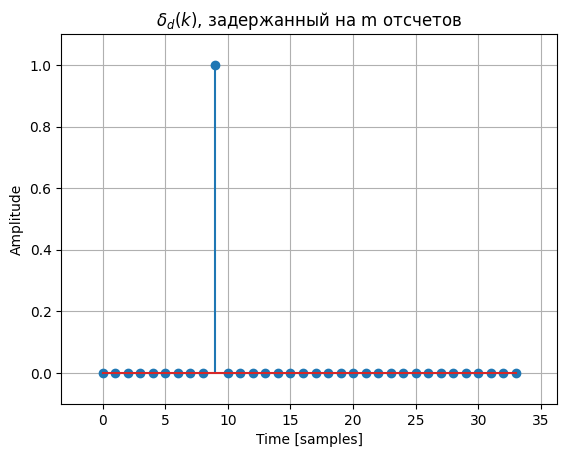

In [ ]:
# Единичный импульс, задержанный на m отсчетов
delta_d = unit_impulse(N, idx=m)
# График
plt.stem(norm_t, delta_d)
plt.margins(0.1, 0.1)
plt.title("$\delta_d(k)$, задержанный на m отсчетов")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

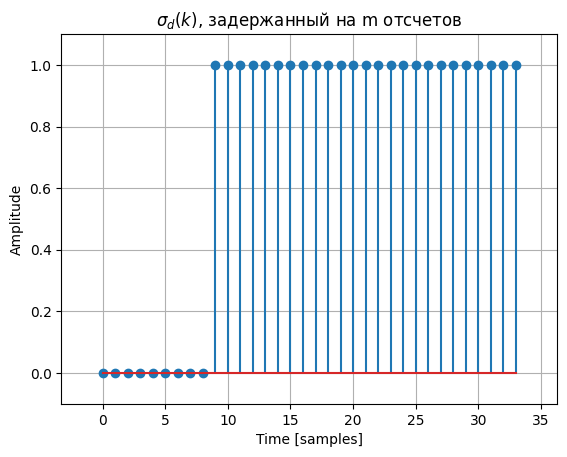

In [ ]:
# Дискретный единичный скачок (Heaviside function), задержанный на m отсчетов
xh = np.heaviside(norm_t - m, 1)
# График
plt.stem(norm_t, xh)
plt.margins(0.1, 0.1)
plt.title("$\sigma_d(k)$, задержанный на m отсчетов")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

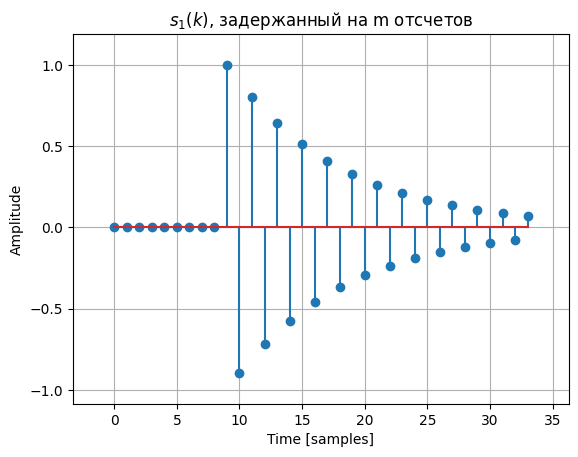

In [ ]:
def discrete_exponential_m(k_arr: list, a: float, m: int) -> list:
    return [a ** (k - m) if k >= m else 0 for k in k_arr]

plt.stem(norm_t, np.real(discrete_exponential_m(norm_t.tolist(), a, m)))
plt.margins(0.1, 0.1)
plt.title("$s_1(k)$, задержанный на m отсчетов")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### Формулы задержанных последовательностей

Проведем модификацию функций сигналов, заменив переменную $k$ на $k - m$. Это приведет к смещению графика по оси $time$ на $m$ единиц дискретного времени вправо.

1. $$\delta_d(k)=
\begin{cases}
1, & k-m=0,\\
0, & k-m\neq0.
\end{cases}
$$

2. $$\sigma_d(k)=
\begin{cases}
1, & k-m\geq0,\\
0, & k-m<0.
\end{cases}
$$

3. $$s(k)=
\begin{cases}
0, & k-m<0,\\
a^{(k-m)}, & k-m\geq0.
\end{cases}
$$

## Выводы

В ходе выполнения практической работы было изучено математическое представление стандартных дискретных сигналов. С использованием программных средств, таких как Python, matplotlib, scipy, были созданы модели:
1. Единичного цифрового импульса. Этот импульс является дискретным аналогом дельта-функции, которая имеет сходные свойства в непрерывном времени.
2. Дискретного единичного скачка, который представляет собой последовательность, в которой значение изменяется мгновенно с нуля на единицу при начале отсчета.
3. Дискретной экспоненциальной функции, которая используются для моделирования убывающих или растущих процессов в дискретном времени
4. Дискретного комплексного гармонического сигнала. Сигнал был также выражен в виде комбинации вещественных последовательностей.